# Problem Statement:  Monitor the behavioural and personality traits of the employee to identify and predict the signs of burnout. Starting with the causes of burnout, it should be possible to predict burnout in the early stages.

In [192]:
#importing files
import matplotlib.pyplot as plt
import numpy as mp
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as s

In [193]:
#DATA COLLECTION
df_full = pd.read_csv(r"C:\Users\ritik\Downloads\train.csv",index_col='Employee ID')
df_test = pd.read_csv(r"C:\Users\ritik\Downloads\test.csv",index_col='Employee ID')
df_full.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [194]:
df_full.dtypes

Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [195]:
#grouping of all data

#data of joining
df_full['Date of Joining'] = pd.to_datetime(df_full['Date of Joining'])
df_test['Date of Joining'] = pd.to_datetime(df_test['Date of Joining'])

#company type
company_type = {'Service': 2 , 'Product': 1}
df_full['Company Type'] = [company_type[j] for j in  df_full['Company Type']]
df_test['Company Type'] = [company_type[j] for j in  df_test['Company Type']]

#gender 
gender = { 'Female': 2 , 'Male': 1 }
df_full['Gender'] = [gender[j] for j in  df_full['Gender']]
df_test['Gender'] = [gender[j] for j in  df_test['Gender']] 

#Designation
df_full['Designation'] = df_full['Designation'].astype('Int64')
df_test['Designation'] = df_test['Designation'].astype('Int64')

#WFH setup
wfh = { 'Yes': 0 , 'No': 1 }
df_full['WFH Setup Available'] = [wfh[j] for j in  df_full['WFH Setup Available']]
df_test['WFH Setup Available'] = [wfh[j] for j in  df_test['WFH Setup Available']]

In [196]:
df_full.dtypes

Date of Joining         datetime64[ns]
Gender                           int64
Company Type                     int64
WFH Setup Available              int64
Designation                      Int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [197]:
# showing all null data
df_full.isnull().sum()

Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [198]:
# removing all null data
df_full = df_full.dropna()

In [199]:
# no null data left
df_full.isnull().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [200]:
#finding pairwise correlation in columns
df_full[['Mental Fatigue Score','Resource Allocation','Designation','Burn Rate']].corr() 

,Mental Fatigue Score,Resource Allocation,Designation,Burn Rate
Mental Fatigue Score,1.000000,0.799563,0.691823,0.944389
Resource Allocation,0.799563,1.000000,0.877893,0.855005
Designation,0.691823,0.877893,1.000000,0.736412
Burn Rate,0.944389,0.855005,0.736412,1.000000


Text(0.5, 1.0, 'Resource Allocation')

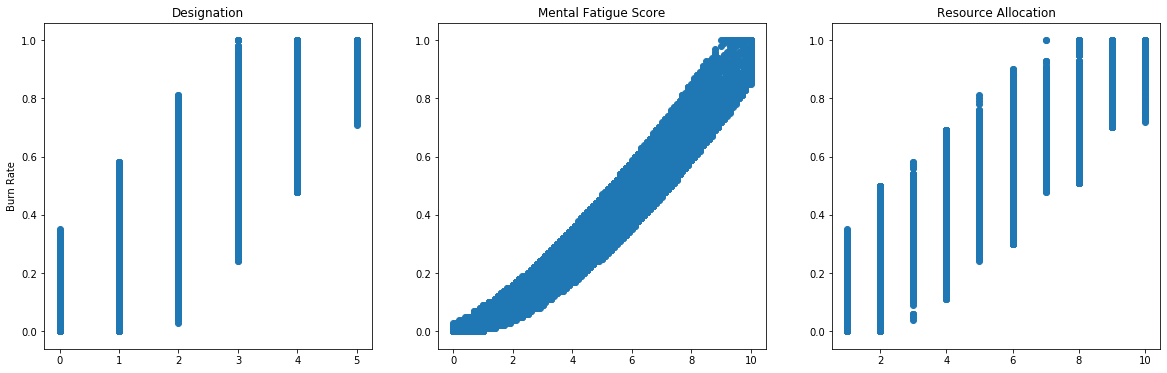

In [201]:
# Showing Burn Rate with respect to Designation,Mental Fatigue Score and Resource Allocation
fig, axs = plt.subplots(1,3,figsize=(20,6))
axs[0].set(ylabel='Burn Rate')
axs[0].scatter(df_full['Designation'],df_full['Burn Rate'])
axs[0].set_title('Designation')
axs[1].scatter(df_full['Mental Fatigue Score'],df_full['Burn Rate'])
axs[1].set_title('Mental Fatigue Score')
axs[2].scatter(df_full['Resource Allocation'],df_full['Burn Rate'])
axs[2].set_title('Resource Allocation')

In [202]:
df_full['Month of Joining'] = df_full['Date of Joining'].dt.month
df_test['Month of Joining'] = df_test['Date of Joining'].dt.month

df_full['Quarter of Joining'] = df_full['Date of Joining'].dt.quarter
df_test['Quarter of Joining'] = df_test['Date of Joining'].dt.quarter

from datetime import date,datetime

seasons = { 'Summer':(datetime(2008,6,21),datetime(2008,9,22)),
            'Autumn':(datetime(2008,9,23),datetime(2008,12,20)),
            'Spring':(datetime(2008,3,21),datetime(2008,6,20)) }

def get_season(row):
    date = row['Date of Joining']
    for season,(season_start,season_end) in seasons.items():
        if date>=season_start and date<=season_end:
            return season
    else:
        return 'Winter'
    

df_full['Season of Joining'] = df_full.apply(lambda row: get_season(row),axis=1)
df_test['Season of Joining'] = df_test.apply(lambda row: get_season(row),axis=1)


In [203]:
# forming dumies

quater_dumnies = pd.get_dummies(df_full['Quarter of Joining'],prefix='Quarter',drop_first=False)
season_dumnies = pd.get_dummies(df_full['Season of Joining'],prefix='Season',drop_first=False)
designation_dumnies = pd.get_dummies(df_full['Designation'],prefix='Designation',drop_first=False)

df_full = pd.concat([df_full,designation_dumnies,quater_dumnies,season_dumnies],axis=1)

quater_dumies_test = pd.get_dummies(df_test['Quarter of Joining'],prefix='Quarter',drop_first=False)
season_dumies_test = pd.get_dummies(df_test['Season of Joining'],prefix='Season',drop_first=False)
designation_dumies_test = pd.get_dummies(df_test['Designation'],prefix='Designation',drop_first=False)

df_test =  pd.concat([df_test,designation_dumies_test,quater_dumies_test,season_dumies_test],axis=1)

In [204]:
# showing data types
df_full.dtypes

Date of Joining         datetime64[ns]
Gender                           int64
Company Type                     int64
WFH Setup Available              int64
Designation                      Int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
Month of Joining                 int64
Quarter of Joining               int64
Season of Joining               object
Designation_0                    uint8
Designation_1                    uint8
Designation_2                    uint8
Designation_3                    uint8
Designation_4                    uint8
Designation_5                    uint8
Quarter_1                        uint8
Quarter_2                        uint8
Quarter_3                        uint8
Quarter_4                        uint8
Season_Autumn                    uint8
Season_Spring                    uint8
Season_Summer                    uint8
Season_Winter                    uint8
dtype: object

In [205]:
# ploting
x = df_full.drop(['Burn Rate','Date of Joining','Quarter of Joining','Season of Joining'],axis=1)
y = df_full['Burn Rate']
x.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Month of Joining',
       'Designation_0', 'Designation_1', 'Designation_2', 'Designation_3',
       'Designation_4', 'Designation_5', 'Quarter_1', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Season_Autumn', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

In [206]:
poly = PolynomialFeatures(interaction_only=True)

x_t = pd.DataFrame(poly.fit_transform(x[['Gender','Company Type','WFH Setup Available','Designation','Resource Allocation','Mental Fatigue Score','Month of Joining']]))

f_list = poly.get_feature_names(['Gender','Company Type','WFH Setup Available','Designation','Resource Allocation','Mental Fatigue Score','Month of Joining'])

x_t.columns = f_list
x_t.head()

,1,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Month of Joining,Gender Company Type,Gender WFH Setup Available,...,WFH Setup Available Designation,WFH Setup Available Resource Allocation,WFH Setup Available Mental Fatigue Score,WFH Setup Available Month of Joining,Designation Resource Allocation,Designation Mental Fatigue Score,Designation Month of Joining,Resource Allocation Mental Fatigue Score,Resource Allocation Month of Joining,Mental Fatigue Score Month of Joining
0,1.0,2.0,2.0,1.0,2.0,3.0,3.8,9.0,4.0,2.0,...,2.0,3.0,3.8,9.0,6.0,7.6,18.0,11.4,27.0,34.2
1,1.0,1.0,2.0,0.0,1.0,2.0,5.0,11.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2.0,5.0,11.0,10.0,22.0,55.0
2,1.0,1.0,2.0,0.0,1.0,1.0,2.6,11.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.6,11.0,2.6,11.0,28.6
3,1.0,2.0,2.0,1.0,3.0,7.0,6.9,7.0,4.0,2.0,...,3.0,7.0,6.9,7.0,21.0,20.7,21.0,48.3,49.0,48.3
4,1.0,1.0,1.0,0.0,2.0,4.0,3.6,11.0,1.0,0.0,...,0.0,0.0,0.0,0.0,8.0,7.2,22.0,14.4,44.0,39.6


In [207]:
x_train,x_test,y_train,y_test = train_test_split(x_t,y,test_size=0.25,random_state=42)

features = ['1','Resource Allocation Mental Fatigue Score','Designation Mental Fatigue Score','WFH Setup Available Mental Fatigue Score','Gender Company Type','Mental Fatigue Score','Resource Allocation','Company Type']

x_train_f = x_train[features]
x_test_f = x_test[features]

f = linear_model.LinearRegression()
f.fit(x_train_f,y_train)

y_predict_f = f.predict(x_test_f)

print(y_predict_f)
print(y_predict_f.shape)

[0.25489868 0.39032275 0.35012219 ... 0.50581453 0.40562211 0.54659334]
(4648,)


In [208]:
print('Coefficients:')
for item in zip(list(x_train_f.columns),f.coef_):
    print(item)
    


Coefficients:
('1', 0.0)
('Resource Allocation Mental Fatigue Score', 0.0029269534133904086)
('Designation Mental Fatigue Score', -0.0005039385815058803)
('WFH Setup Available Mental Fatigue Score', 0.0015780147215048537)
('Gender Company Type', -0.0024425278559733468)
('Mental Fatigue Score', 0.06453558531415243)
('Resource Allocation', 0.008376507912484241)
('Company Type', 0.004499633703898387)


In [191]:
#result
print("Result")
print(f.score(x_train_f,y_train))
print(f.score(x_test_f,y_test))

Result
0.9242586252645024
0.9245447414242371
